# Inspect cross-validation results

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

%matplotlib inline

# Configure matplotlib theme.
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 300,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)
#plt.style.use("huddlej")

In [2]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def get_matthews_correlation_coefficient_for_data_frame(freq_df, return_confusion_matrix=False):
        """Calculate Matthew's correlation coefficient from a given pandas data frame
        with columns for initial, observed, and predicted frequencies.
        """
        observed_growth = (freq_df["observed_freq"] > freq_df["initial_freq"])
        predicted_growth = (freq_df["predicted_freq"] > freq_df["initial_freq"])
        true_positives = ((observed_growth) & (predicted_growth)).sum()
        false_positives= ((~observed_growth) & (predicted_growth)).sum()

        observed_decline = (freq_df["observed_freq"] <= freq_df["initial_freq"])
        predicted_decline = (freq_df["predicted_freq"] <= freq_df["initial_freq"])
        true_negatives = ((observed_decline) & (predicted_decline)).sum()
        false_negatives = ((~observed_decline) & (predicted_decline)).sum()

        mcc = matthews_correlation_coefficient(
            true_positives,
            true_negatives,
            false_positives,
            false_negatives
        )

        if return_confusion_matrix:
            confusion_matrix = {
                "tp": true_positives,
                "tn": true_negatives,
                "fp": false_positives,
                "fn": false_negatives
            }

            return mcc, confusion_matrix
        else:
            return mcc

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

def calculate_correlation_for_df(df):    
    return pearsonr(df["observed_growth_rate"], df["predicted_growth_rate"])[0]

def facet_time_plot(data, value, value_label):
    g = sns.FacetGrid(data, col="predictors", col_wrap=3, height=4)
    g.map_dataframe(sns.lineplot, x="timepoint", y=value, estimator="mean", ci="sd", markers=True, dashes=False,
                   style="predictors")
    g.set_axis_labels("Date", value_label)

    for ax in g.axes.flatten():
        ax.axhline(y=0, color="#cccccc")

        start, end = [int(value) for value in ax.get_xlim()]
        end = end + 1
        stepsize = 2.0
        ax.xaxis.set_ticks(np.arange(start, end, stepsize))

        labels = ax.get_xticklabels()
        output = plt.setp(labels, rotation=30)
        
    return g

In [3]:
df = pd.read_table("model_validation.tab", keep_default_na=False, na_values="N/A")

In [4]:
df.head()

,fn,fp,last_training_timepoint,n_samples,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,43,2011.25,96,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,-0.065967,0,53,0.021132,-0.004777,9,92,2006-2018
1,0,44,2011.75,94,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.002412,0,50,0.044311,-0.032019,10,92,2006-2018
2,0,11,2012.25,68,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,-0.056438,0,57,0.076877,0.139788,11,92,2006-2018
3,0,18,2012.75,57,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,-0.004965,0,39,0.088750,0.145272,12,92,2006-2018
4,0,24,2013.25,42,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,0.146574,0,18,0.116042,0.135197,13,92,2006-2018


In [5]:
df.shape

(88, 26)

In [6]:
df.columns

Index([u'fn', u'fp', u'last_training_timepoint', u'n_samples',
       u'parameter-cTiterSub', u'parameter-dms', u'parameter-ep',
       u'parameter-ep_x', u'parameter-lbi', u'parameter-ne',
       u'parameter-ne_star', u'parameter-null', u'predictors', u'sae',
       u'sample', u'sse', u'test_timepoint', u'testing_accuracy',
       u'testing_correlation', u'tn', u'tp', u'training_accuracy',
       u'training_correlation', u'training_windows', u'viruses',
       u'year_range'],
      dtype='object')

In [7]:
df.head()

,fn,fp,last_training_timepoint,n_samples,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,43,2011.25,96,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,-0.065967,0,53,0.021132,-0.004777,9,92,2006-2018
1,0,44,2011.75,94,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.002412,0,50,0.044311,-0.032019,10,92,2006-2018
2,0,11,2012.25,68,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,-0.056438,0,57,0.076877,0.139788,11,92,2006-2018
3,0,18,2012.75,57,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,-0.004965,0,39,0.088750,0.145272,12,92,2006-2018
4,0,24,2013.25,42,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,0.146574,0,18,0.116042,0.135197,13,92,2006-2018


In [8]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictors").aggregate({
    "testing_accuracy": agg_functions,
    "sse": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("sse", "mean")]), 3)

testing_accuracy           sse         testing_correlation       
                       mean    std   mean     std                mean    std
predictors                                                                  
cTiterSub             0.592  0.361  5.029   6.149               0.513  0.409
lbi                   0.163  0.661  5.321   5.912               0.192  0.659
ne                    0.469  0.481  5.398   6.159               0.475  0.423
dms                   0.424  0.347  5.833   6.080               0.333  0.533
null                  0.000  0.000  6.018   6.399               0.010  0.067
ne_star              -0.170  0.548  6.132   6.431              -0.217  0.498
ep_x                 -0.159  0.558  6.590   6.983               0.005  0.623
ep                   -0.391  0.437  9.745  10.444              -0.358  0.470

In [9]:
error_df = df.groupby("predictors").aggregate({"sse": "sum", "sae": "sum", "n_samples": "sum"})

In [10]:
# Calculate mean squared error.
mse = (error_df["sse"] / error_df["n_samples"]).sort_values()
mse

predictors
cTiterSub    0.079947
lbi          0.084585
ne           0.085809
dms          0.092715
null         0.095661
ne_star      0.097476
ep_x         0.104747
ep           0.154903
dtype: float64

In [11]:
mse_df = mse.reset_index().rename({0: "mse"}, axis=1)
mse_df

,predictors,mse
0,cTiterSub,0.079947
1,lbi,0.084585
2,ne,0.085809
3,dms,0.092715
4,null,0.095661
5,ne_star,0.097476
6,ep_x,0.104747
7,ep,0.154903


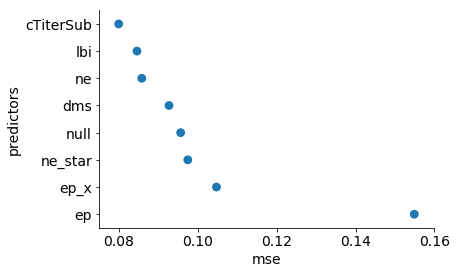

In [12]:
sns.pointplot(
    x="mse",
    y="predictors",
    data=mse_df,
    join=False
)

In [13]:
# Calculate mean absolute error
mae = (error_df["sae"] / error_df["n_samples"]).sort_values()
mae

predictors
cTiterSub    0.202480
lbi          0.212903
ne           0.215231
dms          0.227900
null         0.230046
ne_star      0.233581
ep_x         0.238194
ep           0.285564
dtype: float64

In [14]:
mae_df = mae.reset_index().rename({0: "mae"}, axis=1)
mae_df

,predictors,mae
0,cTiterSub,0.202480
1,lbi,0.212903
2,ne,0.215231
3,dms,0.227900
4,null,0.230046
5,ne_star,0.233581
6,ep_x,0.238194
7,ep,0.285564


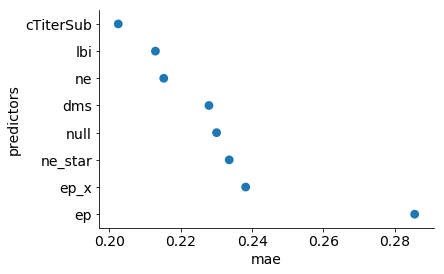

In [15]:
sns.pointplot(
    x="mae",
    y="predictors",
    data=mae_df,
    join=False
)

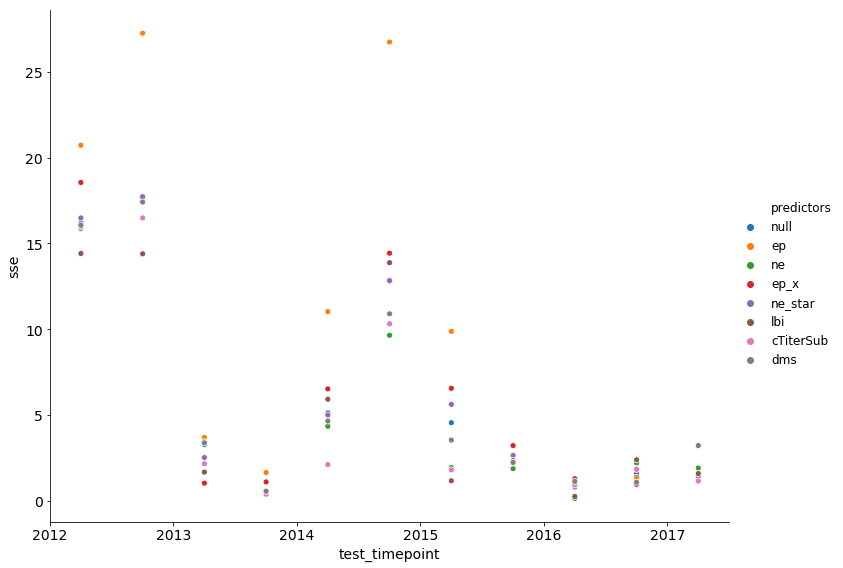

In [16]:
g = sns.relplot(
    "test_timepoint",
    "sse",
    hue="predictors",
    data=df,
    height=8,
    aspect=1.3,
    kind="scatter"
)
#for ax in g.axes.flatten():
#    ax.set_xlim(df["test_timepoint"].min() - 1, df["test_timepoint"].max() + 1)

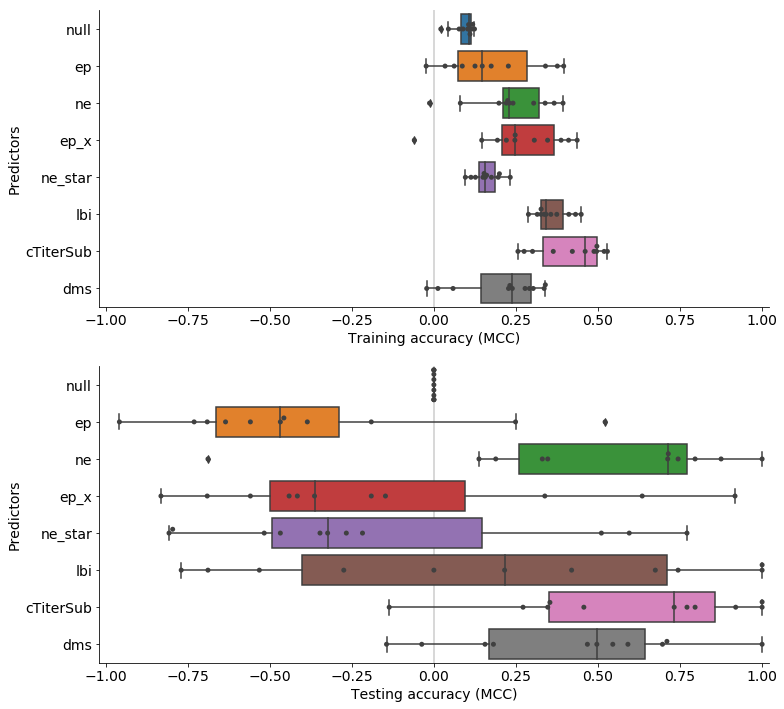

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

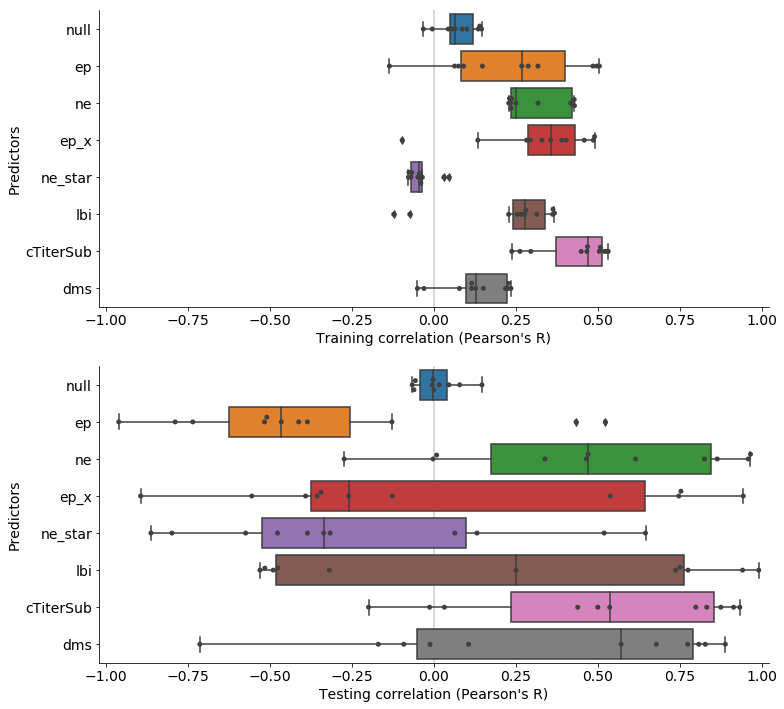

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training correlation on the top panel.
sns.boxplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training correlation (Pearson's R)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing correlation on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing correlation (Pearson's R)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

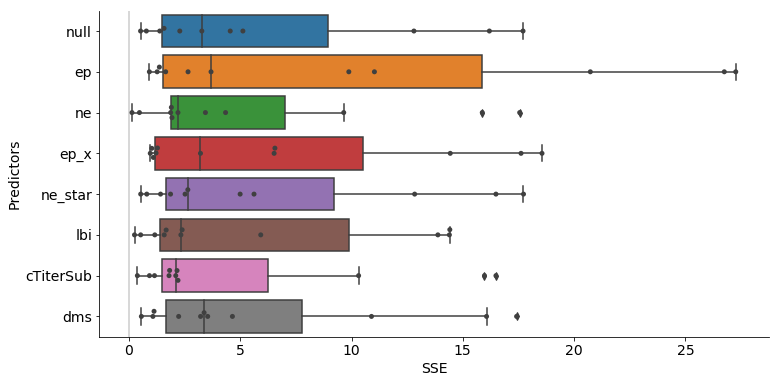

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="sse",
    data=df,
    ax=ax
)
sns.swarmplot(
    y="predictors",
    x="sse",
    data=df,
    ax=ax,
    color="0.25"
)

ax.set_xlabel("SSE")
ax.set_ylabel("Predictors")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

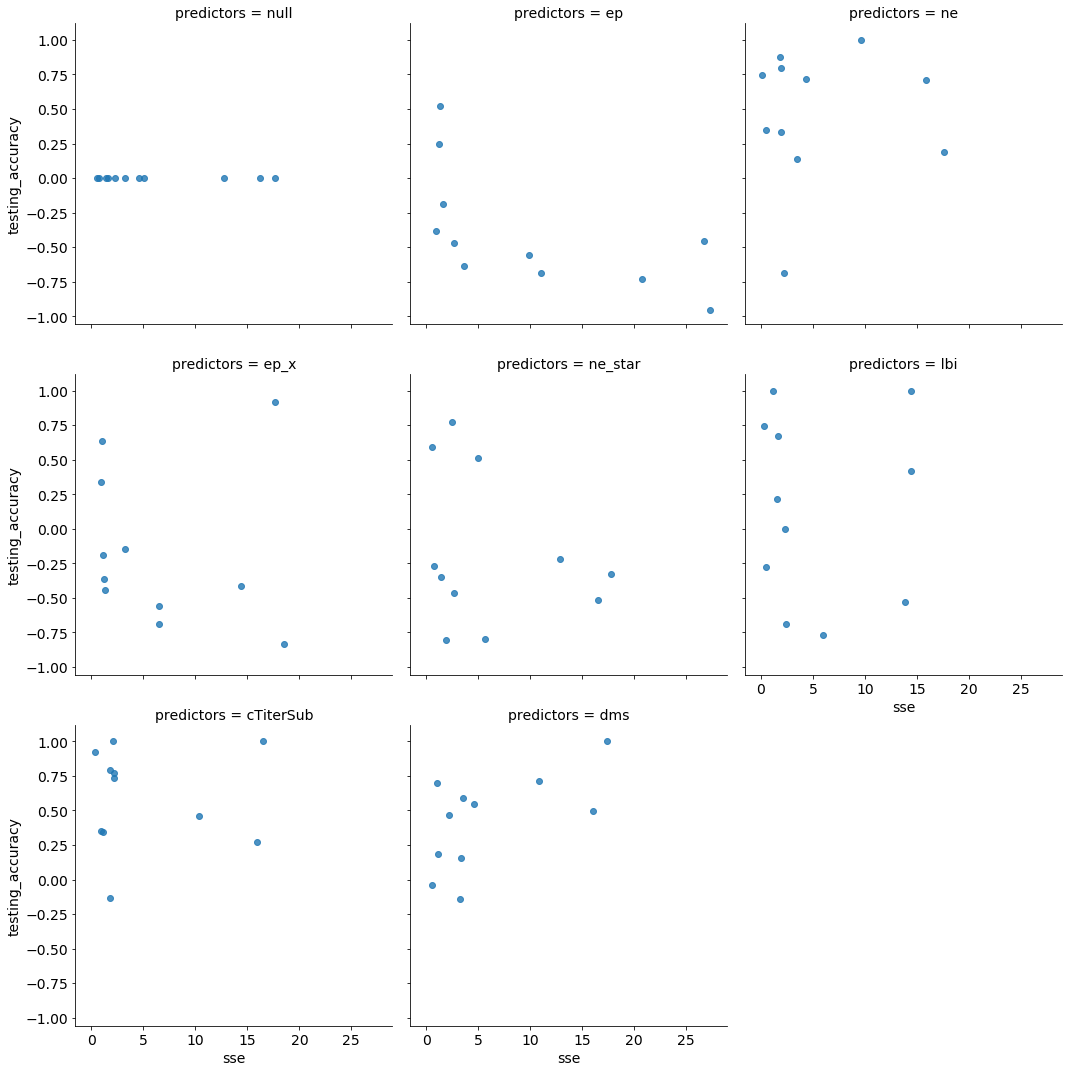

In [50]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="sse",
    y="testing_accuracy",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

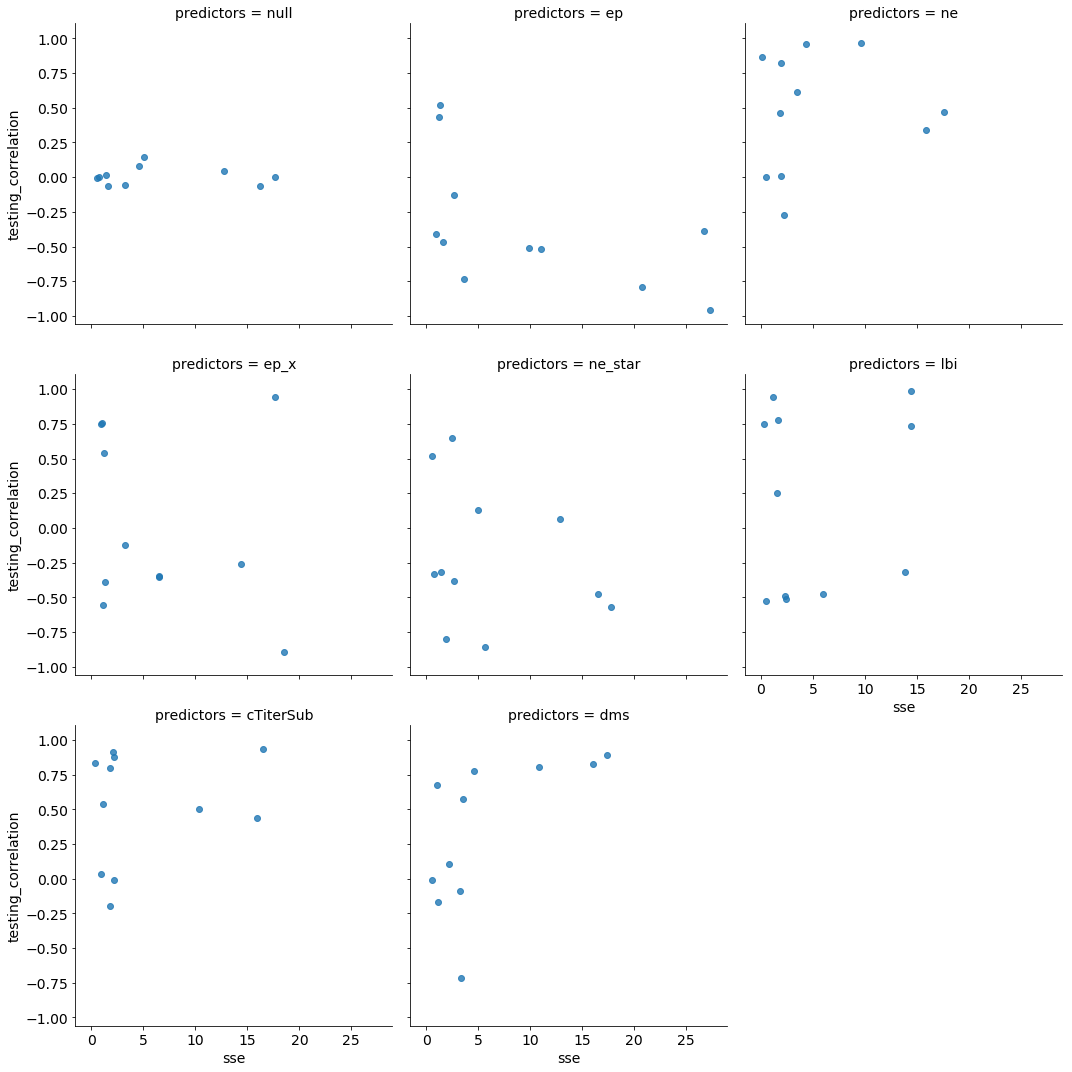

In [53]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="sse",
    y="testing_correlation",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

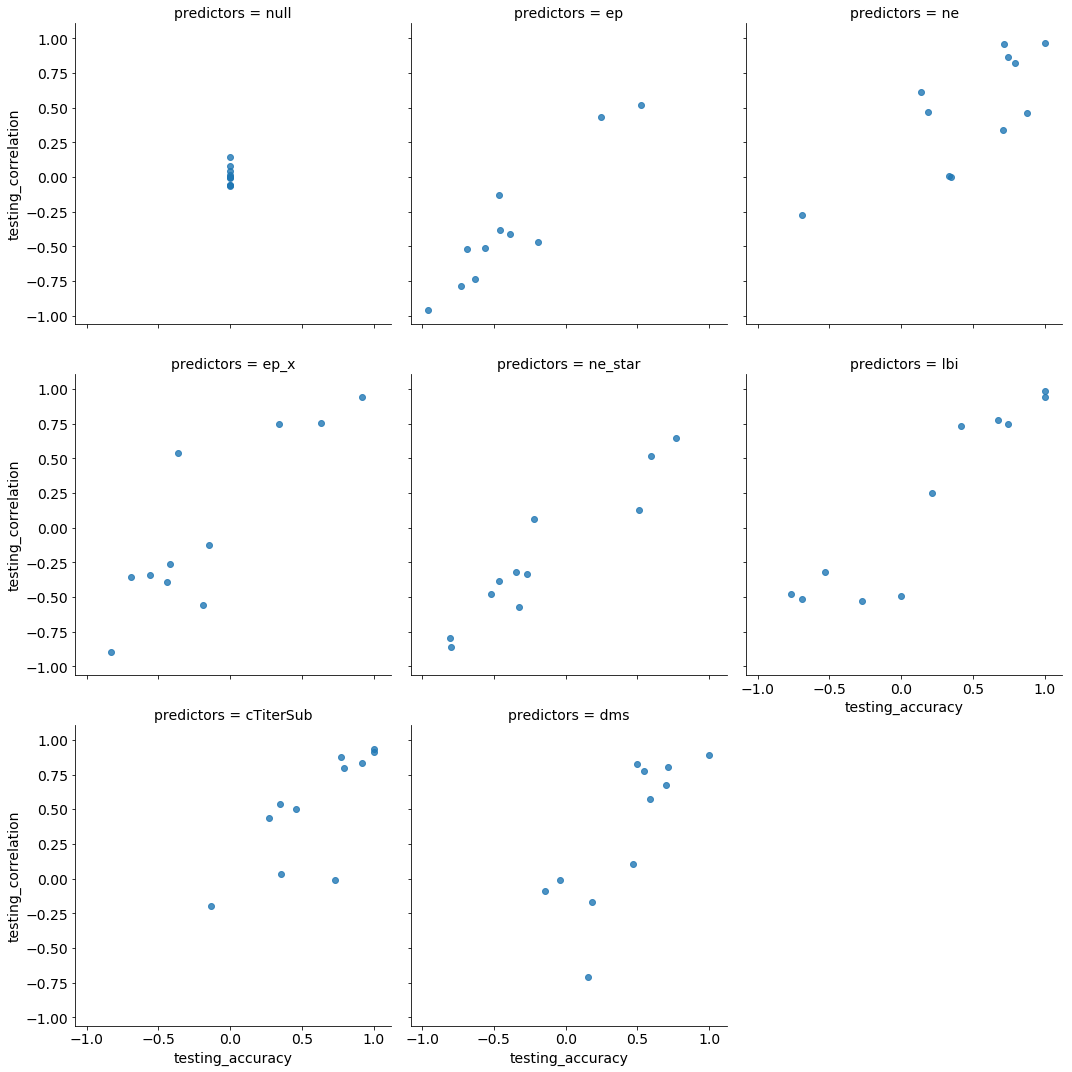

In [52]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="testing_accuracy",
    y="testing_correlation",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

In [47]:
df.head()

,fn,fp,last_training_timepoint,n_samples,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,43,2011.25,96,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,-0.065967,0,53,0.021132,-0.004777,9,92,2006-2018
1,0,44,2011.75,94,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.002412,0,50,0.044311,-0.032019,10,92,2006-2018
2,0,11,2012.25,68,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,-0.056438,0,57,0.076877,0.139788,11,92,2006-2018
3,0,18,2012.75,57,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,-0.004965,0,39,0.088750,0.145272,12,92,2006-2018
4,0,24,2013.25,42,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,0.146574,0,18,0.116042,0.135197,13,92,2006-2018


In [20]:
df["predictors"].unique()

array(['null', 'ep', 'ne', 'ep_x', 'ne_star', 'lbi', 'cTiterSub', 'dms'], dtype=object)

In [21]:
parameter_columns = [column for column in df.columns if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").aggregate(["mean", "std"])

parameter-cTiterSub           parameter-dms           parameter-ep  \
                          mean       std          mean       std         mean   
predictors                                                                      
cTiterSub              0.62588  0.348877           NaN       NaN          NaN   
dms                        NaN       NaN       0.30641  0.174005          NaN   
ep                         NaN       NaN           NaN       NaN     0.635917   
ep_x                       NaN       NaN           NaN       NaN          NaN   
lbi                        NaN       NaN           NaN       NaN          NaN   
ne                         NaN       NaN           NaN       NaN          NaN   
ne_star                    NaN       NaN           NaN       NaN          NaN   
null                       NaN       NaN           NaN       NaN          NaN   

                     parameter-ep_x         parameter-lbi            \
                 std           mean     std          mean       std   
predictors                                                            
cTiterSub        NaN            NaN     NaN           NaN       NaN   
dms              NaN            NaN     NaN           NaN       NaN   
ep          0.965253            NaN     NaN           NaN       NaN   
ep_x             NaN       1.499065  0.9463           NaN       NaN   
lbi              NaN            NaN     NaN      0.451218  0.179652   
ne               NaN            NaN     NaN           NaN       NaN   
ne_star          NaN            NaN     NaN           NaN       NaN   
null             NaN            NaN     NaN           NaN       NaN   

           parameter-ne           parameter-ne_star           parameter-null  \
                   mean       std              mean       std           mean   
predictors                                                                     
cTiterSub           NaN       NaN               NaN       NaN            NaN   
dms                 NaN       NaN               NaN       NaN            NaN   
ep                  NaN       NaN               NaN       NaN            NaN   
ep_x                NaN       NaN               NaN       NaN            NaN   
lbi                 NaN       NaN               NaN       NaN            NaN   
ne             0.487792  0.213423               NaN       NaN            NaN   
ne_star             NaN       NaN         -1.904818  1.131741            NaN   
null                NaN       NaN               NaN       NaN            0.0   

                 
            std  
predictors       
cTiterSub   NaN  
dms         NaN  
ep          NaN  
ep_x        NaN  
lbi         NaN  
ne          NaN  
ne_star     NaN  
null        0.0

In [22]:
parameters_df = df.loc[:, ["predictors"] + parameter_columns].melt(
    "predictors",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [23]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

In [24]:
parameters_df.head()

,predictors,predictor,parameter
66,cTiterSub,cTiterSub,0.030757
67,cTiterSub,cTiterSub,0.069563
68,cTiterSub,cTiterSub,0.200182
69,cTiterSub,cTiterSub,0.674875
70,cTiterSub,cTiterSub,0.740067


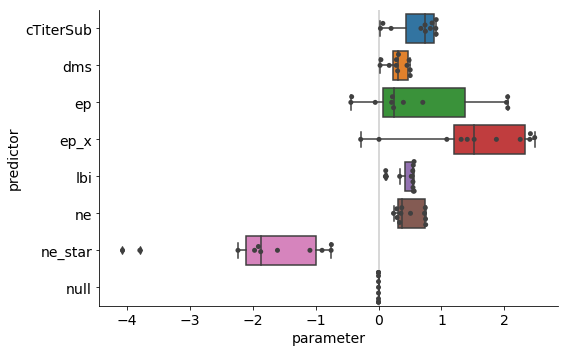

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.boxplot(
    y="predictor",
    x="parameter",
    data=parameters_df,
    ax=ax,
    dodge=False
)

sns.swarmplot(
    y="predictor",
    x="parameter",
    data=parameters_df,
    ax=ax,
    color="0.25"
)

ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
sns.despine()
plt.tight_layout()

In [26]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn     63
fp    103
tn    212
tp    314
dtype: int64

In [27]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

692

In [28]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum(axis=1)

66    96
67    94
68    68
69    57
70    42
71    54
72    44
73    45
74    45
75    75
76    72
dtype: int64

## Load raw model data

These data include observed and predicted clade frequencies for all clades across all timepoints in the cross-validation test data.

In [29]:
model_df = pd.read_table("models.tab", keep_default_na=False, na_values="N/A")

In [30]:
model_df.head()

,clade,clade_size,initial_freq,observed_freq,predicted_freq,projected_timepoint,timepoint,year_range,viruses,predictors,sample
0,NODE_0011507,187,0.112568,0.011337,0.112571,2013.25,2012.25,2006-2018,92,null,0
1,NODE_0011454,283,0.123386,0.011354,0.123389,2013.25,2012.25,2006-2018,92,null,0
2,NODE_0011452,286,0.123399,0.011354,0.123402,2013.25,2012.25,2006-2018,92,null,0
3,NODE_0011450,288,0.123399,0.011354,0.123402,2013.25,2012.25,2006-2018,92,null,0
4,NODE_0011448,292,0.123401,0.011354,0.123404,2013.25,2012.25,2006-2018,92,null,0


In [31]:
model_df["observed_growth_rate"] = model_df["observed_freq"] / model_df["initial_freq"]
model_df["predicted_growth_rate"] = model_df["predicted_freq"] / model_df["initial_freq"]

In [32]:
test_df = model_df[model_df["predictors"] == "cTiterSub"].copy()

In [33]:
correlation = pearsonr(test_df["observed_growth_rate"], test_df["predicted_growth_rate"])[0]
mcc, confusion_matrix = get_matthews_correlation_coefficient_for_data_frame(test_df, return_confusion_matrix=True)
accuracy = (confusion_matrix["tp"] + confusion_matrix["tn"]) / float(sum(confusion_matrix.values()))

(0, 5)

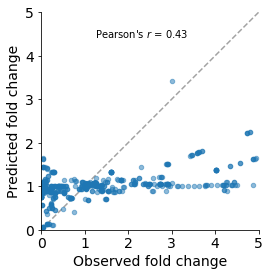

In [34]:
min_rate = 0
max_rate = 5
x = y = np.linspace(min_rate, max_rate, 100)
ax = test_df.plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax.plot(x, y, "--", color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Pearson's $r$ = %.2f" % correlation,
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [35]:
accurate_clades = (
    ((test_df["observed_growth_rate"] > 1) & (test_df["predicted_growth_rate"] > 1)) |
    ((test_df["observed_growth_rate"] < 1) & (test_df["predicted_growth_rate"] < 1))
)

(0, 5)

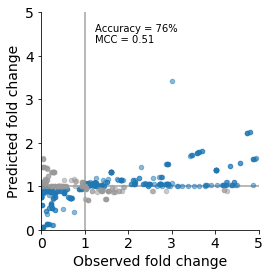

In [36]:
min_rate = 0
max_rate = 5
ax = test_df[accurate_clades].plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax = test_df[~accurate_clades].plot(
    ax=ax,
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    color="#999999"
)

ax.axhline(1, color="#999999", alpha=0.9, zorder=-10)
ax.axvline(1, color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Accuracy = %i%%\nMCC = %.2f" % (accuracy * 100, mcc),
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [37]:
df_by_timepoint = model_df.groupby(["predictors", "timepoint", "sample"])

In [38]:
model_correlation_by_time = df_by_timepoint.apply(
    calculate_correlation_for_df
).reset_index(name="correlation")

In [39]:
test = model_correlation_by_time[model_correlation_by_time["predictors"].isin(["null", "lbi", "cTiterSub"])].dropna()

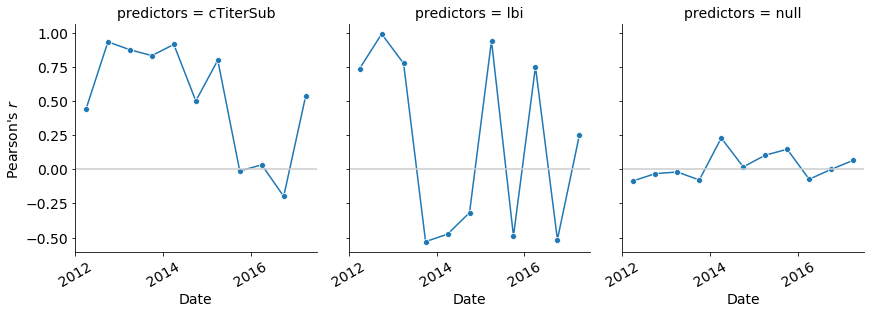

In [40]:
g = facet_time_plot(test, "correlation", "Pearson's $r$")

In [41]:
model_mcc_by_time = df_by_timepoint.apply(
    get_matthews_correlation_coefficient_for_data_frame
).reset_index(name="mcc")

In [42]:
mcc_test = model_mcc_by_time[model_mcc_by_time["predictors"].isin(["null", "lbi", "cTiterSub"])].dropna()

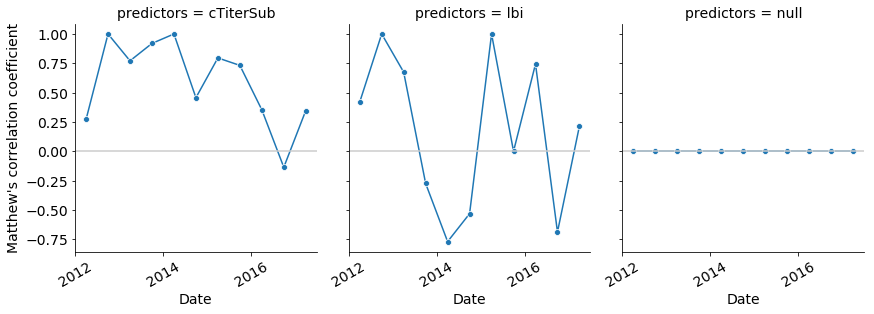

In [43]:
g = facet_time_plot(mcc_test, "mcc", "Matthew's correlation coefficient")

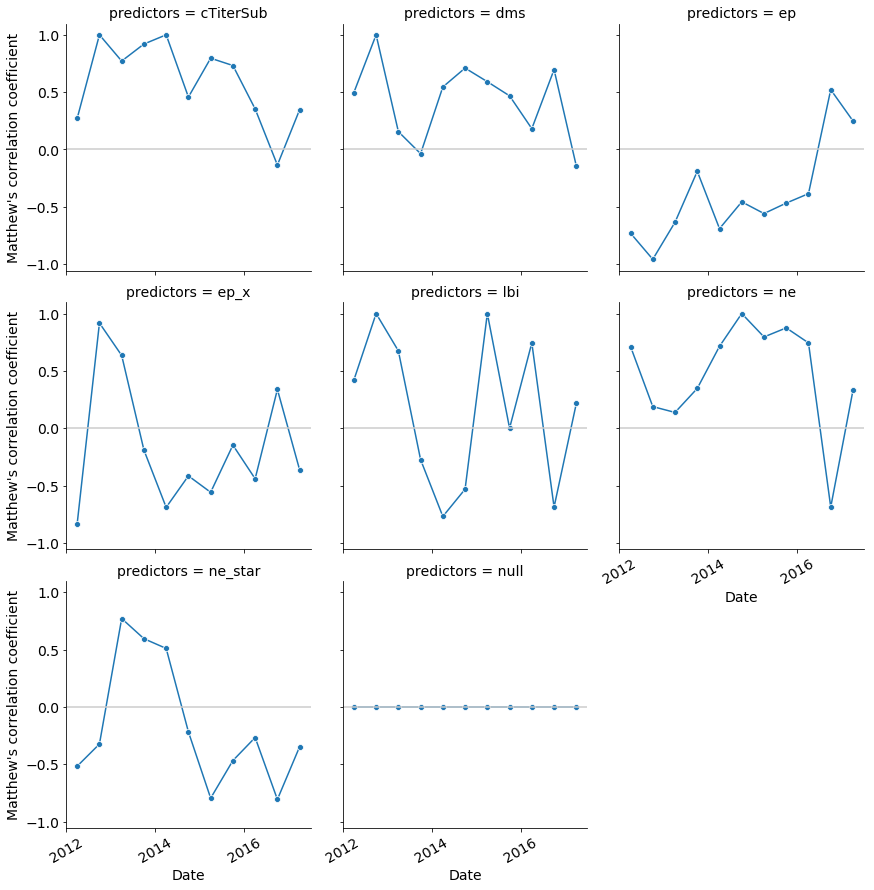

In [44]:
g = facet_time_plot(model_mcc_by_time, "mcc", "Matthew's correlation coefficient")